### Sentiment Analysis and Visualization of Stock News

##### importing required modules

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#getting the finviz url
finviz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
#tickers for parsing
tickers = ['AMZN', 'GOOG', 'FB']

In [4]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url=url, headers={'user-agent': 'my-app'}) #sending request to finviz.com
    response = urlopen(req)
    print(response)
    
    html = BeautifulSoup(response, 'html') #parsing the html code and getting it in a BeautifulSoup
    print(html)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

<!DOCTYPE html>
<html>
<head>
<title>AMZN Amazon.com, Inc. Stock Quote</title>
<meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="-1" http-equiv="Expires"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-900.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/inter-latin.woff2" rel="preload"/>
<li

##### news_tables dictionary includes just the tables of the results from the web page

In [5]:
print(news_tables)

{'AMZN': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Nov-26-21 07:30AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/11/26/this-1-popular-beverage-maker-took-a-big-step-towa/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">This Popular Beverage Maker Took a Big Step Toward Larger Gains for Its Investors</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">07:09AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.marketwatch.com/picks/this-is-the-no-1-thing-to-buy-on-black-friday-01637928583?siteid=yhoof2" target="_blank"

In [6]:
#example of parsing the text of articles title from table row and also the date and time
amzn_data = news_tables['AMZN']
amzn_rows = amzn_data.findAll('tr')

for index, row in enumerate(amzn_rows):
    title = row.a.text
    timestamp = row.td.text
    
    print(timestamp + " " + title)

Nov-26-21 07:30AM   This Popular Beverage Maker Took a Big Step Toward Larger Gains for Its Investors
07:09AM   This is the No.1 thing to buy on Black Friday
07:07AM   3 Buffett Stocks to Buy Hand Over Fist Before November Ends
06:35AM   The absolute best deals on Black Friday
05:30AM   Extinction Rebellion targets Amazon warehouses in Black Friday blockade
04:42AM   Black Friday sales: Shoppers warned against buying these dangerous dud products
02:44AM   Amazon's Black Friday greeted by climate activists, strikes in Europe
02:38AM   UPDATE 4-Amazon's Black Friday greeted by climate activists, strikes in Europe
Nov-25-21 03:21PM   Pakistan e-commerce platform Daraz aims to beef up as Amazon eyes market
01:11PM   German Union to Call Workers' Strike: Will It Hurt Amazon (AMZN)?
11:16AM   Pakistan e-commerce platform Daraz aims to beef up as Amazon eyes market
10:30AM   Here's My Top Growth Stock To Buy Now
08:45AM   2 Reasons dLocal Is My Top Buy Right Now
08:35AM   Will Palantir Be a T

#### Taking the dataset and parsing it in order to get the ticker, date, time and title

In [7]:
#implementing data scrapping from the website
parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:    #implies we only have time stamp
            time = date[0]
        else:
            date = date_data[0]
            time = date_data[1]
       
        parsed_data.append([ticker,date, time, title])
print(parsed_data)
        

[['AMZN', 'Nov-26-21', '07:30AM\xa0\xa0', 'This Popular Beverage Maker Took a Big Step Toward Larger Gains for Its Investors'], ['AMZN', 'Nov-26-21', 'N', 'This is the No.1 thing to buy on Black Friday'], ['AMZN', 'Nov-26-21', 'N', '3 Buffett Stocks to Buy Hand Over Fist Before November Ends'], ['AMZN', 'Nov-26-21', 'N', 'The absolute best deals on Black Friday'], ['AMZN', 'Nov-26-21', 'N', 'Extinction Rebellion targets Amazon warehouses in Black Friday blockade'], ['AMZN', 'Nov-26-21', 'N', 'Black Friday sales: Shoppers warned against buying these dangerous dud products'], ['AMZN', 'Nov-26-21', 'N', "Amazon's Black Friday greeted by climate activists, strikes in Europe"], ['AMZN', 'Nov-26-21', 'N', "UPDATE 4-Amazon's Black Friday greeted by climate activists, strikes in Europe"], ['AMZN', 'Nov-25-21', '03:21PM\xa0\xa0', 'Pakistan e-commerce platform Daraz aims to beef up as Amazon eyes market'], ['AMZN', 'Nov-25-21', 'N', "German Union to Call Workers' Strike: Will It Hurt Amazon (AMZ

## Applying sentiment analysis

In [8]:
#creating a data frame to store our parsed data
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df.head()

,ticker,date,time,title
0,AMZN,Nov-26-21,07:30AM,This Popular Beverage Maker Took a Big Step To...
1,AMZN,Nov-26-21,N,This is the No.1 thing to buy on Black Friday
2,AMZN,Nov-26-21,N,3 Buffett Stocks to Buy Hand Over Fist Before ...
3,AMZN,Nov-26-21,N,The absolute best deals on Black Friday
4,AMZN,Nov-26-21,N,Extinction Rebellion targets Amazon warehouses...


##### Applying polarity score to the title

In [9]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f) #creating a new column with compund polarity score of each title

df.head()

,ticker,date,time,title,compound
0,AMZN,Nov-26-21,07:30AM,This Popular Beverage Maker Took a Big Step To...,0.6369
1,AMZN,Nov-26-21,N,This is the No.1 thing to buy on Black Friday,0.0000
2,AMZN,Nov-26-21,N,3 Buffett Stocks to Buy Hand Over Fist Before ...,0.4939
3,AMZN,Nov-26-21,N,The absolute best deals on Black Friday,0.6369
4,AMZN,Nov-26-21,N,Extinction Rebellion targets Amazon warehouses...,0.0516


## Visualization of the data

In [10]:
df['date'] = pd.to_datetime(df.date).dt.date   #converting date from normal string to date time format

plt.figure(figsize=(10, 8))

mean_df = df.groupby(['ticker', 'date']).mean()   #getting mean of all compound values of every ticker for a particular date

print(mean_df)

                   compound
ticker date                
AMZN   2021-11-22  0.153795
       2021-11-23  0.109133
       2021-11-24  0.111459
       2021-11-25  0.098483
       2021-11-26  0.109850
FB     2021-11-18  0.099800
       2021-11-19  0.064181
       2021-11-20  0.464750
       2021-11-21  0.296900
       2021-11-22  0.210629
       2021-11-23 -0.007860
       2021-11-24  0.118188
       2021-11-25  0.252871
       2021-11-26  0.262733
GOOG   2021-11-19  0.179376
       2021-11-20  0.412860
       2021-11-21  0.228700
       2021-11-22  0.143433
       2021-11-23  0.079635
       2021-11-24  0.111873
       2021-11-25  0.160675
       2021-11-26  0.088800


<Figure size 720x576 with 0 Axes>

In [11]:
#unstacking the data
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()
print(mean_df)

ticker          AMZN        FB      GOOG
date                                    
2021-11-18       NaN  0.099800       NaN
2021-11-19       NaN  0.064181  0.179376
2021-11-20       NaN  0.464750  0.412860
2021-11-21       NaN  0.296900  0.228700
2021-11-22  0.153795  0.210629  0.143433
2021-11-23  0.109133 -0.007860  0.079635
2021-11-24  0.111459  0.118188  0.111873
2021-11-25  0.098483  0.252871  0.160675
2021-11-26  0.109850  0.262733  0.088800


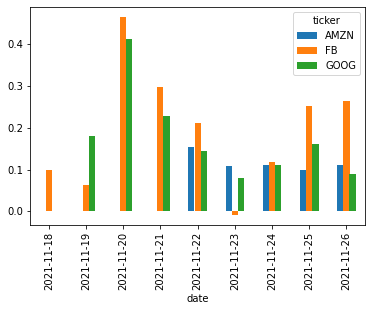

In [13]:
#plotting
mean_df.plot(kind='bar')
plt.show()